#### Tests

In [194]:
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

from utils import (
    make_dir_for_filename,
    load_from_json,
    write_to_json
)

In [195]:
X = np.load(os.path.join("datasets/ethan_test_dataset", "trainX.npy"))
y = np.load(os.path.join("datasets/ethan_test_dataset", "trainY.npy"))

In [196]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9999999999976981

In [390]:
def get_data(config_name):
    filename = os.path.join("runs", config_name, "train_val.json")
    train_val = load_from_json(filename)
    
    epochs = sorted([int(x) for x in train_val.keys()])
#     print(epochs)
    train_loss = []
    val_loss = []
    for epoch in epochs:
        train_loss.append(train_val[str(epoch)]["train"])
        val_loss.append(train_val[str(epoch)]["val"])
    
    print(train_loss[-1])
    data = {
        "config_name": config_name,
        "epochs": epochs,
        "train_loss": train_loss,
        "val_loss": val_loss
    }
    return data

In [391]:
def plot_data(data):
    fig = plt.figure(figsize=(10,10))
    plt.title("train val progress")
    plt.plot(data["epochs"], data["train_loss"], label="train")
    plt.plot(data["epochs"], data["val_loss"], label="val")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
#     plt.yscale("log")
    plt.show()

In [392]:
# data

0.08689530163197394


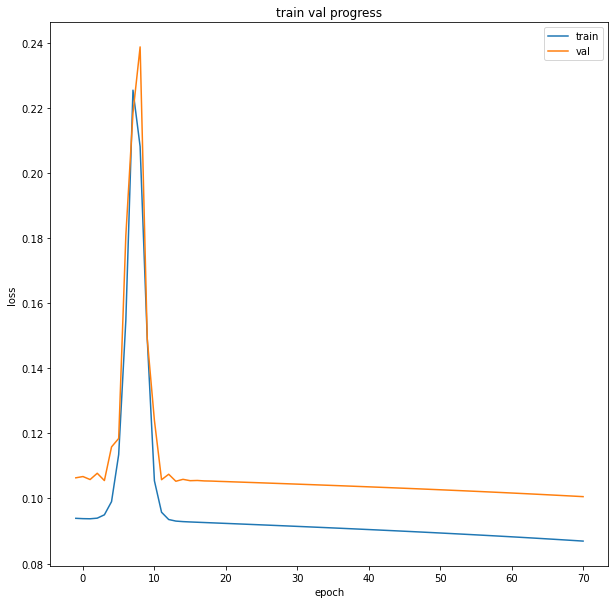

In [397]:
data = get_data(config_name="ethan_config_name")
plot_data(data)

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


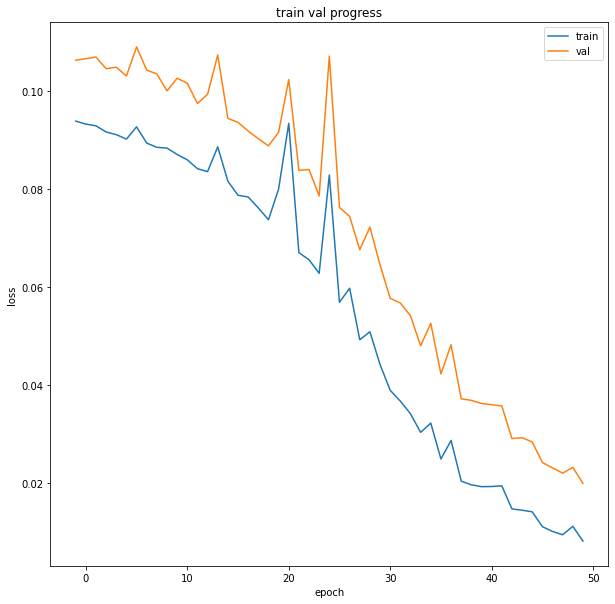

In [374]:
data = get_data(config_name="ethan_config_name")
plot_data(data)

In [299]:
import torch

In [203]:
a = torch.tensor(4).float()
b = torch.tensor(2).float()

In [204]:
torch.norm(a - b)

tensor(2.)

In [206]:
torch.pow(a - b, 2).sum()

tensor(4.)